In [21]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV as gsc
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as mlp
import pickle
from skimage import io
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
path_data = 'E:\\CIFAR-10\\train'    #importing images CIFAR-10
X = np.zeros((50000,3072))
for i in range(1,50001) :
    X[i-1]=pd.DataFrame(io.imread(os.path.join(path_data,str(i) + '.png')).flatten()).as_matrix().T
    print (i)

In [4]:
pickle.dump(X,open("X.p","wb"))

In [2]:
X=pickle.load(open("X.p","rb"))

In [13]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59.0,62.0,63.0,43.0,46.0,45.0,50.0,48.0,43.0,68.0,...,104.0,216.0,184.0,140.0,151.0,118.0,84.0,123.0,92.0,72.0
1,154.0,177.0,187.0,126.0,137.0,136.0,105.0,104.0,95.0,102.0,...,136.0,143.0,133.0,139.0,143.0,134.0,142.0,143.0,133.0,144.0
2,255.0,255.0,255.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,...,79.0,78.0,85.0,83.0,79.0,85.0,83.0,80.0,86.0,84.0
3,28.0,25.0,10.0,37.0,34.0,19.0,38.0,35.0,20.0,42.0,...,38.0,54.0,47.0,28.0,63.0,56.0,37.0,72.0,65.0,46.0
4,170.0,180.0,198.0,168.0,178.0,196.0,177.0,185.0,203.0,183.0,...,78.0,75.0,79.0,82.0,71.0,75.0,78.0,73.0,77.0,80.0
5,159.0,102.0,101.0,150.0,91.0,95.0,153.0,95.0,97.0,154.0,...,14.0,166.0,47.0,14.0,173.0,51.0,17.0,182.0,57.0,19.0
6,164.0,206.0,84.0,105.0,140.0,61.0,118.0,148.0,101.0,129.0,...,41.0,94.0,134.0,29.0,91.0,133.0,26.0,122.0,170.0,44.0
7,28.0,35.0,39.0,30.0,34.0,44.0,33.0,44.0,47.0,62.0,...,117.0,106.0,144.0,100.0,104.0,142.0,99.0,101.0,140.0,96.0
8,134.0,186.0,223.0,131.0,184.0,220.0,128.0,182.0,218.0,133.0,...,128.0,31.0,94.0,136.0,32.0,94.0,137.0,32.0,94.0,138.0
9,125.0,125.0,116.0,110.0,101.0,91.0,102.0,90.0,83.0,106.0,...,81.0,143.0,117.0,82.0,143.0,116.0,84.0,144.0,116.0,86.0


In [14]:
d=np.zeros((50000,1))

In [15]:
for i in range(50000):
    d[i]=np.mean(X[i,:])

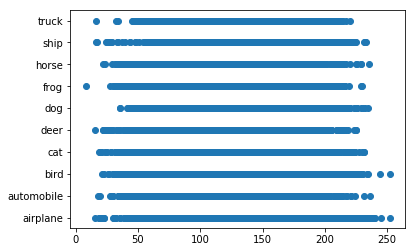

In [24]:
plt.scatter(d,y)
plt.show()

In [18]:
y = pd.DataFrame.from_csv("E:\\CIFAR-10\\trainLabels.csv")     #importing image labels CIFAR-10
y = y.label.as_matrix()
y.shape

(50000,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92)   
#Creating train and test flaps from imported data

In [6]:
y_train[23972]

'bird'

In [7]:
test = np.zeros((200,40000))


In [ ]:
for i in range(200) :                                           #KNN main logic (Euclidean distance metrics)
    for j in range(0,40000) :
        test[i][j]=np.sum((np.abs(X_test[i]-X_train[j])))
    print (i)
            
    

In [90]:
y_pred = np.empty((200,1),dtype=object)                         #training on the a subset of training data (200/50000) using KNN
for i in range(200) :                                           #nearest_neighbour set to "1"
    y_pred[i] = y_train[np.argmin(test[i])]
    print (i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [91]:
r = y_pred               #Predicted labels from KNN algorithm
r[:10]

array([['bird'],
       ['bird'],
       ['bird'],
       ['frog'],
       ['truck'],
       ['dog'],
       ['airplane'],
       ['airplane'],
       ['deer'],
       ['ship']], dtype=object)

In [92]:
d= pd.DataFrame(y_test[:200]).as_matrix()                 #the correct labels from the dataset used
d[:10]

array([['bird'],
       ['cat'],
       ['bird'],
       ['bird'],
       ['airplane'],
       ['dog'],
       ['airplane'],
       ['airplane'],
       ['horse'],
       ['ship']], dtype=object)

In [93]:
counter = 0                               #Prediction Accuracy on the dataset
for i in range(200) :
    if(r[i] == d[i]) :
        counter = counter + 1
print (((counter/200) *100),"%","accuracy")

41.5 % accuracy


In [8]:
#cut the crap
model_KNN = KNN(n_neighbors = 10)              #KNN template from scikit learn (nearest_neighbours = 10)
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [18]:
model_KNN.score(X_test[:4000],y_test[:4000])

0.32550000000000001

In [35]:
X_train_new = PCA(n_components = 10).fit_transform(X_train)     #Extracting important features... reducing 3000-D data to 10-D

In [36]:
X_test_new = PCA(n_components = 10).fit_transform(X_test)

In [29]:
model_KNN = KNN(n_neighbors = 150,p=2)   #Fitting KNN after PCA
model_KNN.fit(X_train_new,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [30]:
model_KNN.score(X_test_new,y_test)

0.3251

In [ ]:
#Moving on to SVMs.......  (phew)

In [ ]:
#Making a support vector machine (SVM) from scratch : 

In [ ]:
#Warning: Following is a failed attempt to create a Support Vector Machine from scratch... 
#--------------------------------------------------------------------------------------------------------------------------------

In [6]:
theta_def = np.random.RandomState(7).rand(10,3072)
func_svm = np.dot(X_train,theta_def.T)
func_svm.shape

(40000, 10)

In [7]:
#class labels for theta_def :
labels = np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])


In [8]:
loss = np.zeros((40000,1))
margins = np.zeros((40000,10))

In [11]:
for k in range(10) :
    
    func_svm = np.dot(X_train,theta_def.T)
    for i in range(40000) :
        label_temp = y_train[i]
        index = np.asscalar(np.array(np.where(labels == label_temp)))
        label_to_use = labels[index]
        for j in range(10) :
            if(j==index) :
                margins[i][j] = 0
            else :
                margins[i][j] = max(0,func_svm[i][j] - func_svm[i][index] + 1)
    for i in range(40000) :
        loss[i] = np.sum(margins[i]) + 0.01 * np.sum(theta_def)
    gradient = np.dot(X_train.T,loss) / 40000
    for i in range(10) :
        theta_def[i] = theta_def[i] - 0.00001 * gradient.T
    print (k)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [13]:
theta_def[0]

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [97]:
pred = np.dot(a.T,X_test.T)
pred_index = np.zeros((1,10000))
pred_index = np.argmax(pred,axis=0)

pred_index

array([0, 0, 9, ..., 9, 7, 9], dtype=int64)

In [94]:
pred_withlabel = np.empty((1,10000),dtype=object)
pred_withlabel = labels[pred_index]
pred_withlabel

array(['airplane', 'airplane', 'truck', ..., 'truck', 'horse', 'truck'],
      dtype='<U10')

In [95]:
y_test

array(['bird', 'cat', 'bird', ..., 'truck', 'bird', 'cat'], dtype=object)

In [96]:
counter = 0
for i in range(10000) :
    if(y_test[i] == pred_withlabel[i]) :
        counter = counter + 1
print (((counter/10000) *100),"%","accuracy")

8.98 % accuracy


In [99]:
for i in range(40000) :
    loss[i] = np.sum(margins[i]) + 0.01 * np.sum(theta_def ** 2)

In [100]:
gradient = np.dot(X_train.T,loss) / 40000
gradient.shape

(3072, 1)

In [84]:
for i in range(10) :
    theta_def[i] = theta_def[i] - 0.000001 * gradient.T

In [9]:
clf = mlp(verbose = 4,hidden_layer_sizes = (1500,700,300),random_state = 3)     #Added three layers into the neural network

In [10]:
clf.fit(X_train,y_train)                        #Training the neural nets on the entire training data

Iteration 1, loss = 8.73976734
Iteration 2, loss = 2.49059977
Iteration 3, loss = 2.03695433
Iteration 4, loss = 1.93766967
Iteration 5, loss = 1.85260972
Iteration 6, loss = 1.78408608
Iteration 7, loss = 1.71981863
Iteration 8, loss = 1.67250883
Iteration 9, loss = 1.65176742
Iteration 10, loss = 1.64042694
Iteration 11, loss = 1.59629855
Iteration 12, loss = 1.58701364
Iteration 13, loss = 1.57535417
Iteration 14, loss = 1.54437968
Iteration 15, loss = 1.54330947
Iteration 16, loss = 1.56772843
Iteration 17, loss = 1.55251440
Iteration 18, loss = 1.54871945
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1500, 700, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=4,
       warm_start=False)

In [11]:
clf.score(X_test,y_test)             #Neural Network model accuracy (yay!)

0.41880000000000001

In [ ]:
""""Okay as we saw most of the "traditional" machine learning models applied here namely Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machines(SVM) could hardly handle this data for sufficiently good predictions with the accuracy scores in the range of (24-35%).

Where as on the other hand, the most sought model in use these days-Neural networks could give finally give us an accuracy score above 40%. We could have added more layers into the neural nets and increased the accuracy, but owing to our system limitation (GPU) it would definitely have taken large training time!!

In [ ]:
""""""""""However nowadays "Deep learning" models are gaining quite a momentum for we can train the data using even larger layers and convolutions in much less time and much higher accuracy.

Following is our hands-on on the Convolutional neural nets(CNN) to come up with a better acccuracy. We specially borrowed another system with a good GPU to let us compute deep CNNs

In [ ]:
Switch to 3rd file ->